In [17]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape

(6031, 162)

In [3]:
sympdf = sympdf.loc[:, (sympdf.sum() / sympdf.shape[0] > 0.05) & (sympdf.sum()  / sympdf.shape[0]< 0.95)]

In [4]:
model = StepMix(n_components=13, measurement="binary", verbose=0, random_state=123)


In [6]:
sympdf_train, sympdf_test = train_test_split(sympdf, test_size=0.2, random_state=123)

In [7]:
model.fit(sympdf_train)

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it, max_LL=-3.26e+5, max_avg_LL=-67.5]


StepMix(measurement='binary', n_components=13, random_state=123)

In [8]:
df['cluster'] = model.predict(sympdf)

<Axes: xlabel='cluster'>

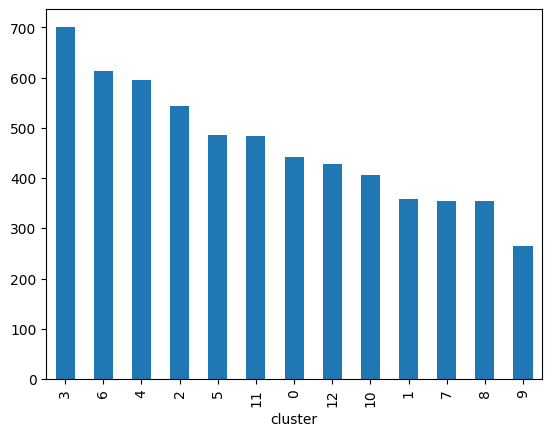

In [9]:
df['cluster'].value_counts().plot(kind='bar')
# slight variation with the full dataset

In [10]:
clust_full = pd.read_csv("output/cluster_13_111023.csv", index_col=0)

In [12]:
# compare the two clusterings using rand index
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(df['cluster'], clust_full['cluster'])

0.36984027526523233

In [13]:
# divide sympdf into train and test multiple times and fit models for each one
models = []
for i in range(10):
    sympdf_train, sympdf_test = train_test_split(sympdf, test_size=0.2, random_state=i)
    model = StepMix(n_components=13, measurement="binary", verbose=0, random_state=i)
    model.fit(sympdf_train)
    models.append(model)

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.79s/it, max_LL=-3.26e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.12s/it, max_LL=-3.25e+5, max_avg_LL=-67.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.32s/it, max_LL=-3.25e+5, max_avg_LL=-67.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.45s/it, max_LL=-3.26e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.40s/it, max_LL=-3.25e+5, max_avg_LL=-67.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it, max_LL=-3.26e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.61s/it, max_LL=-3.25e+5, max_avg_LL=-67.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.97s/it, max_LL=-3.26e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it, max_LL=-3.25e+5, max_avg_LL=-67.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.86s/it, max_LL=-3.25e+5, max_avg_LL=-67.4]


In [22]:
import pandas as pd
from sklearn.metrics import adjusted_rand_score
from itertools import combinations

# Initialize an empty list to store ARI values
ari_list = []

# Calculate ARI between all pairs of models
for i, j in combinations(range(10), 2):
    labels_i = models[i].predict(sympdf)
    labels_j = models[j].predict(sympdf)
    ari_score = adjusted_rand_score(labels_i, labels_j)
    ari_list.append({"Model_1": i, "Model_2": j, "ARI": ari_score})

# Create a DataFrame from the list of dictionaries
ari_df = pd.DataFrame(ari_list)

# Display the DataFrame
print(ari_df)


    Model_1  Model_2       ARI
0         0        1  0.379958
1         0        2  0.470401
2         0        3  0.417632
3         0        4  0.403542
4         0        5  0.415195
5         0        6  0.348413
6         0        7  0.492773
7         0        8  0.494042
8         0        9  0.411657
9         1        2  0.410438
10        1        3  0.563673
11        1        4  0.450210
12        1        5  0.516468
13        1        6  0.394552
14        1        7  0.447951
15        1        8  0.400108
16        1        9  0.593141
17        2        3  0.541089
18        2        4  0.533614
19        2        5  0.407649
20        2        6  0.481152
21        2        7  0.521789
22        2        8  0.536571
23        2        9  0.479084
24        3        4  0.598568
25        3        5  0.441154
26        3        6  0.457527
27        3        7  0.477814
28        3        8  0.578542
29        3        9  0.557040
30        4        5  0.523105
31      

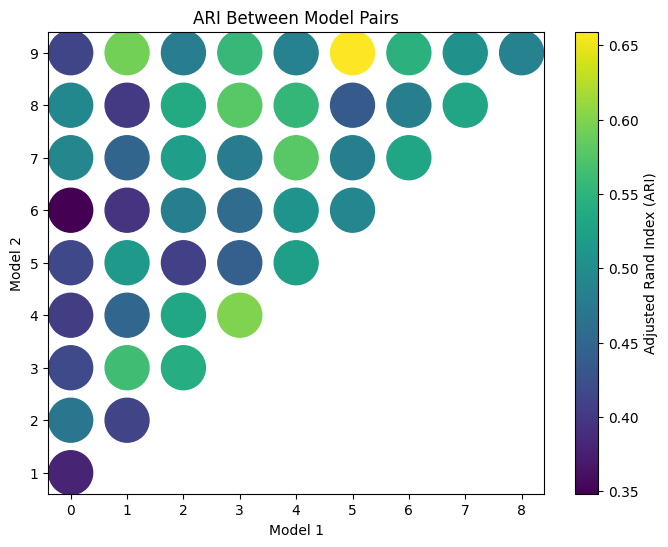

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(ari_df["Model_1"], ari_df["Model_2"], c=ari_df["ARI"], cmap="viridis", s=1000)
plt.colorbar(label="Adjusted Rand Index (ARI)")
plt.xlabel("Model 1")
plt.ylabel("Model 2")
plt.title("ARI Between Model Pairs")
plt.show()

In [25]:
ari_df['ARI'].mean()

0.48933439181587585

In [21]:
sympdf_test

,Symptom_Memory_short,Symptom_Memory_long,Symptom_Memory_no_new_memories,Symptom_Memory_forget_tasks,Symptom_Memory_other,Symptom_Cognitive_Functioning_thinking,Symptom_Cognitive_Functioning_executive,Symptom_Cognitive_Functioning_problemsolving,Symptom_Cognitive_Functioning_slowedthoughts,Symptom_Cognitive_Functioning_fastthoughts,...,Symptom_Gastrointestinal_abdominal_pain,Symptom_Gastrointestinal_hyperactive_bowel,Symptom_SkinAllergy_itchy_skin,Symptom_SkinAllergy_itchy_eyes,Symptom_SkinAllergy_heighted_reaction_allergies,Symptom_SkinAllergy_brittle_nail,Symptom_SkinAllergy_other_itchy,Symptom_PEM,Symptom_Change_sensitivity_to_meds,Symptom_New_allergies
2342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,1,0
8195,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
12234,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
9116,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2202,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12072,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1,0,0,0,1,0,0,1,1,0
10744,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1406,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
6827,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,0,1,0,0,0,0,1,0,0


In [26]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette score for each model
for i, model in enumerate(models):
    labels = model.predict(sympdf_test)
    silhouette_avg = silhouette_score(sympdf_test, labels)
    print(f"Silhouette score for model {i}: {silhouette_avg}")

Silhouette score for model 0: -0.03129693881270035
Silhouette score for model 1: -0.0233378114946634
Silhouette score for model 2: -0.025032094289947363
Silhouette score for model 3: -0.01910162512733687
Silhouette score for model 4: -0.026182175740532512
Silhouette score for model 5: -0.02424895773622512
Silhouette score for model 6: -0.029340028822203466
Silhouette score for model 7: -0.029627051695888643
Silhouette score for model 8: -0.02896551115597842
Silhouette score for model 9: -0.025820438826619937


In [27]:
for i, model in enumerate(models):
    labels = model.predict(sympdf_train)
    silhouette_avg = silhouette_score(sympdf_train, labels)
    print(f"Silhouette score for model {i}: {silhouette_avg}")

Silhouette score for model 0: -0.031098697628263297
Silhouette score for model 1: -0.02039748409341105
Silhouette score for model 2: -0.022350884590714153
Silhouette score for model 3: -0.01737989624067313
Silhouette score for model 4: -0.02486684402540681
Silhouette score for model 5: -0.02257508477160813
Silhouette score for model 6: -0.03172452039355484
Silhouette score for model 7: -0.028245742610943713
Silhouette score for model 8: -0.026126861936795608
Silhouette score for model 9: -0.02105678768566922
